# Session 2 — Graphical Representation

**Learning goals**
- Build and interpret bar charts, histograms, pie charts, and scatter plots.
- Practice good labeling, fonts, orientation, and styling in Matplotlib.



## 0) Setup & Data

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data for the bar chart (favorite programming languages)
languages = ["Python", "Java", "C++", "JavaScript"]
counts = [40, 25, 15, 20]

# Data for the histogram: synthetic exam scores using normal distribution
scores = np.random.normal(loc=50, scale=10, size=200)

# Data for the pie chart (regional sales %)
regions = ["North", "South", "East", "West"]
shares = [30, 25, 20, 25]

# Data for the scatter plot (study hours vs. exam scores). Linear relation with scatter.
study_hours = np.random.randint(1, 11, size=50)
exam_scores = 8 * study_hours + np.random.normal(0, 6, size=50) + 45


## 1) Bar Chart — Step by Step
Follow the steps and observe changes.

### Step 1 — Basic bar chart

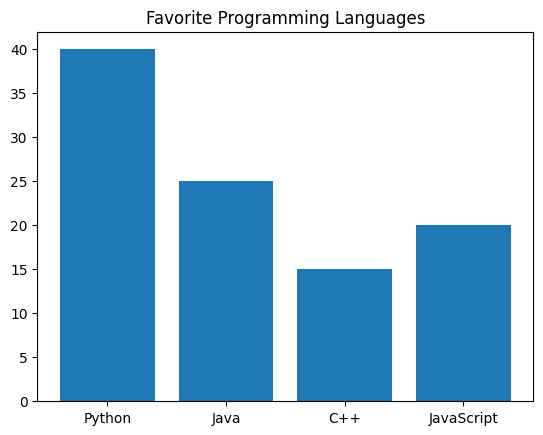

In [2]:

plt.figure()
plt.bar(languages, counts)
plt.title("Favorite Programming Languages")
plt.show()


### Step 2 — Add axis labels and a better title

Use xlabel, ylabel, and title to add more information

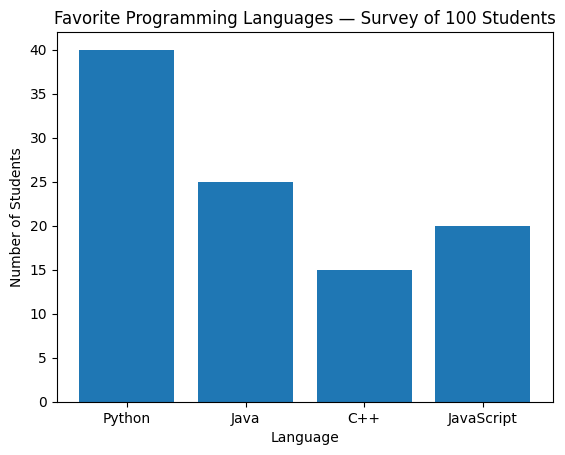

In [3]:

plt.figure()
plt.bar(languages, counts)
plt.title("Favorite Programming Languages — Survey of 100 Students")
plt.xlabel("Language")
plt.ylabel("Number of Students")
plt.show()


### Step 3 — Change bar color(s)
- Single color for all bars by changing color in plt.bar
- Highlight 1 bar in red. For this create an array of color (lenght of language) and change 1 color, Python

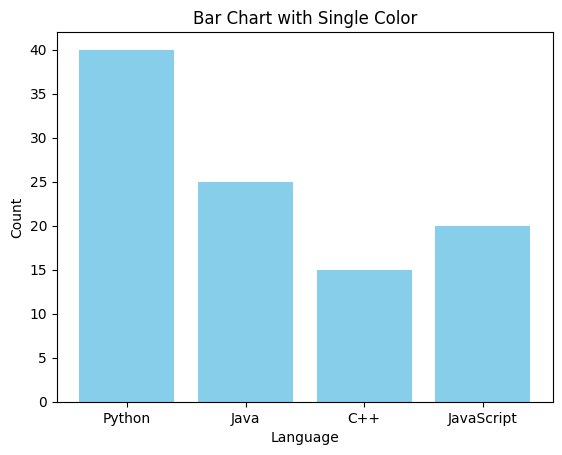

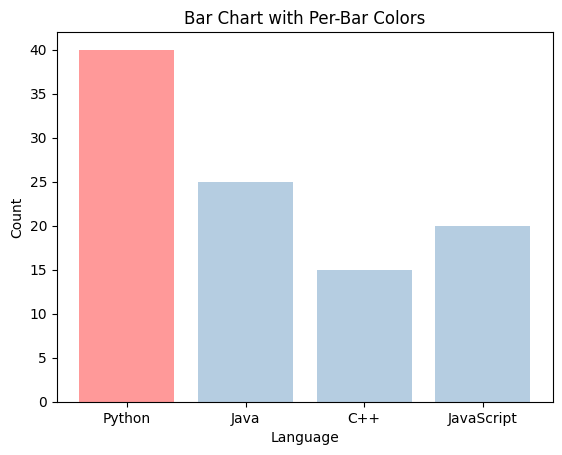

In [6]:

plt.figure()
# Single color for all bars
plt.bar(languages, counts, color="skyblue")
plt.title("Bar Chart with Single Color")
plt.xlabel("Language"); plt.ylabel("Count")
plt.show()

#Start with all bars in blue
colors = ["steelblue"] * len(languages)

# Highlight one bar (e.g., Python) in red
highlight_index = languages.index("Python")
colors[highlight_index] = "red"


plt.figure()
# Different color per bar
plt.bar(languages, counts, color=colors,alpha=0.4)
plt.title("Bar Chart with Per-Bar Colors")
plt.xlabel("Language"); plt.ylabel("Count")
plt.show()


### Step 4 — Horizontal bars (orientation)
Use `plt.barh` for **horizontal** bar charts. This can improve readability of long labels.

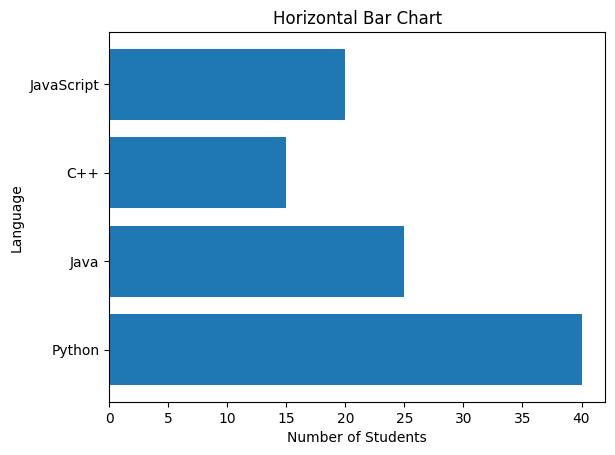

In [7]:

plt.figure()
plt.barh(languages, counts)  # note: categories become y-values
plt.title("Horizontal Bar Chart")
plt.xlabel("Number of Students")
plt.ylabel("Language")
plt.show()


### Step 5 — Order the bars

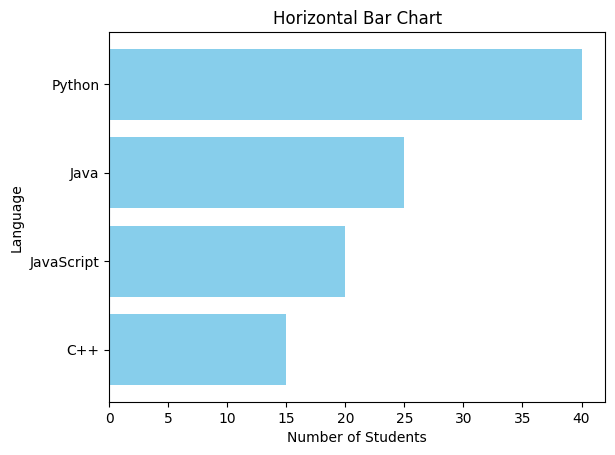

In [11]:

plt.figure()
# Sort data by counts descending
sorted_pairs = sorted(zip(counts, languages), reverse=False)
sorted_counts, sorted_languages = zip(*sorted_pairs)

# Horizontal bar chart, ordered
plt.barh(sorted_languages, sorted_counts, color="skyblue")

plt.title("Horizontal Bar Chart")
plt.xlabel("Number of Students")
plt.ylabel("Language")
plt.show()


### Step 6 — Fonts and bold text
Use `fontsize` and `fontweight` to control appearance.

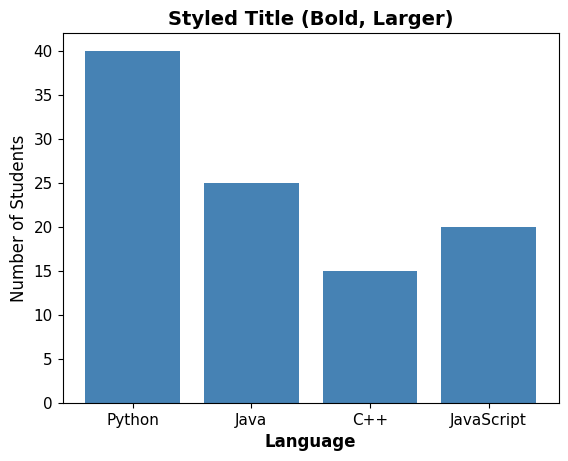

In [12]:

plt.figure()
plt.bar(languages, counts, color="steelblue")
plt.title("Styled Title (Bold, Larger)", fontsize=14, fontweight="bold")
plt.xlabel("Language", fontsize=12, fontweight="bold")
plt.ylabel("Number of Students", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()


### Step 7 — Add **value labels** on bars
Annotate each bar with its count.

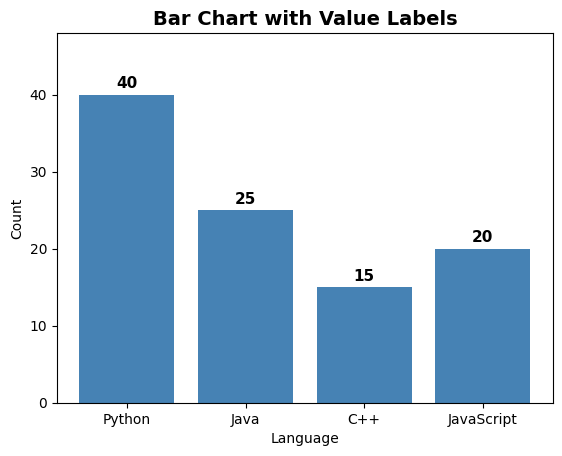

In [13]:

plt.figure()
bars = plt.bar(languages, counts, color="steelblue")
plt.title("Bar Chart with Value Labels", fontsize=14, fontweight="bold")
plt.xlabel("Language"); plt.ylabel("Count")

# Add labels on top of bars
for b in bars:
    height = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, height + 0.5, f"{int(height)}",
             ha="center", va="bottom", fontsize=11, fontweight="bold")

plt.ylim(0, max(counts) + 8)  # add headroom so labels fit
plt.show()


### Step 9 — Apply what you learned in class to make a beautiful graphs

- Add title which tells you something
- Be minimalist
- Highlight the Python value

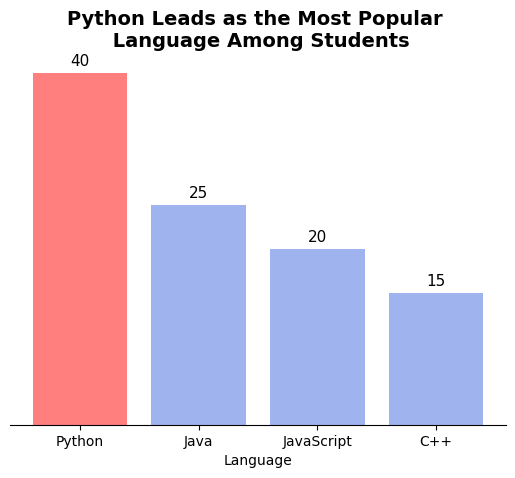

In [31]:

# Sort data
sorted_pairs = sorted(zip(counts, languages), reverse=True)
sorted_counts, sorted_languages = zip(*sorted_pairs)

colors = ["royalblue"] * len(languages)
highlight_index = languages.index("Python")
colors[highlight_index] = "red"

plt.figure()
bars=plt.bar(sorted_languages, sorted_counts,alpha=0.5,color=colors)

# Add labels on top of bars
for b in bars:
    height = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, height + 0.5, f"{int(height)}",
             ha="center", va="bottom", fontsize=11)


# Remove Y-axis
plt.gca().axes.get_yaxis().set_visible(False)

# Remove unnecessary spines
for spine in ["left", "right", "top"]:
    plt.gca().spines[spine].set_visible(False)

plt.title("Python Leads as the Most Popular \n Language Among Students",
          fontsize=14, fontweight="bold")
plt.xlabel("Language")
plt.show()


## 2) Histogram — Distribution of Numerical Data
**Task:** Plot a histogram of `scores` with 15 bins, label axes and title, and show a vertical line at the mean.

- use plt.hist with the optins bins
- use plt.axvline for the vertical line

**Solution:**

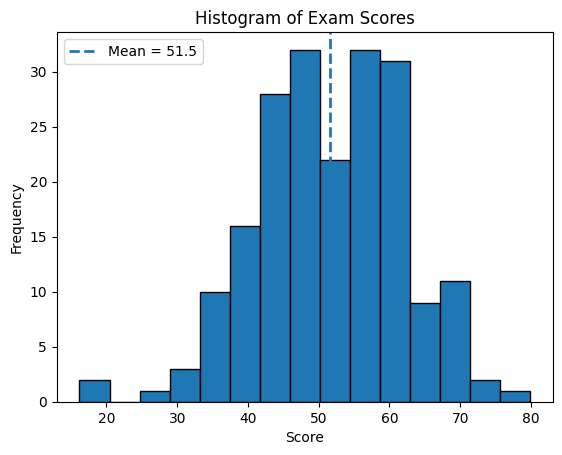

In [32]:

plt.figure()
plt.hist(scores, bins=15, edgecolor="black")
plt.title("Histogram of Exam Scores")
plt.xlabel("Score"); plt.ylabel("Frequency")

# Add mean line
mean_score = np.mean(scores)
plt.axvline(mean_score, linestyle="--", linewidth=2, label=f"Mean = {mean_score:.1f}")
plt.legend()
plt.show()


## 3) Pie Chart — Proportions
**Task:** Build a pie chart of regional sales (`regions`, `shares`), show percentages, and ensure a nice reading order.

-use plt.pie

Is it the best way to represent the data? If not what will you do?

**Solution:**

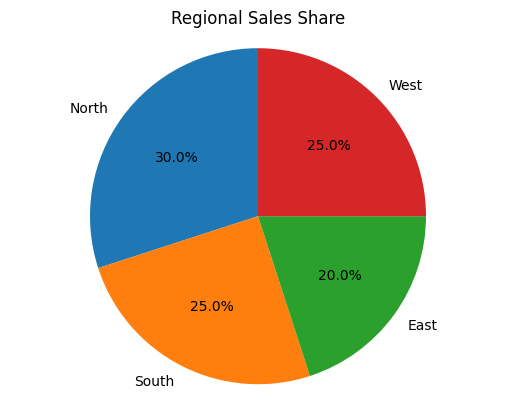

In [33]:

plt.figure()
plt.pie(shares, labels=regions, autopct="%1.1f%%", startangle=90)
plt.title("Regional Sales Share")
plt.axis("equal")  # equal aspect ratio ensures the pie is circular
plt.show()


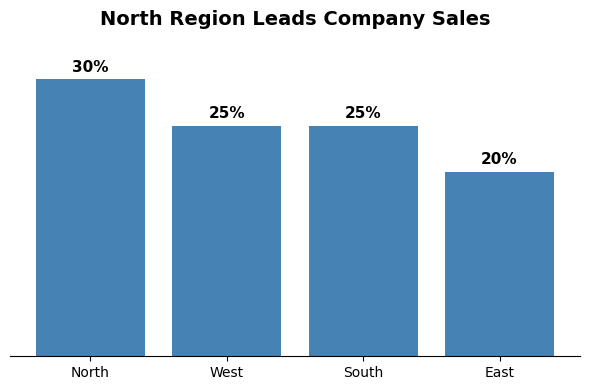

In [34]:
# Sort for better readability (highest first)
sorted_pairs = sorted(zip(shares, regions), reverse=True)
sorted_shares, sorted_regions = zip(*sorted_pairs)

plt.figure(figsize=(6,4))

bars = plt.bar(sorted_regions, sorted_shares, color="steelblue")

# Minimalist storytelling title
plt.title("North Region Leads Company Sales", fontsize=14, fontweight="bold")

# Remove Y-axis (we will label values directly)
plt.gca().axes.get_yaxis().set_visible(False)

# Add value labels on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
             f"{height}%", ha="center", va="bottom",
             fontsize=11, fontweight="bold")

# Remove chart borders for cleaner look
for spine in ["left", "right", "top"]:
    plt.gca().spines[spine].set_visible(False)

plt.ylim(0, max(sorted_shares) + 5)  # add space for labels
plt.tight_layout()
plt.show()

## 4) Scatter Plot — Relationship Between Two Variables
**Task:** Plot `study_hours` vs `exam_scores`, label axes,

-use plt.scatter

**Solution:**

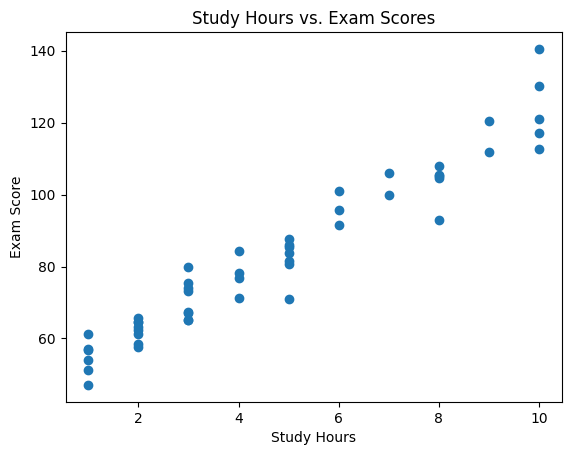

In [35]:

plt.figure()
plt.scatter(study_hours, exam_scores)
plt.title("Study Hours vs. Exam Scores")
plt.xlabel("Study Hours"); plt.ylabel("Exam Score")

plt.show()
